# Parte 1. IMPORTACION DE DATASET

## Instalacion e Importacion de librerias

### Instalacion de librerias
Aqui procederemos a instalar las librerias necesarias para ejecutar el proyecto
* pandas
* numpy
* matplotlib
* kagglehub
* ydata-profiling
* ace-tools-open

In [ ]:
%pip install pandas numpy matplotlib kagglehub ydata-profiling ace-tools-open

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=b11130a87a11993b48d3c8d429c84804932271ad049674ddd4f92821de2bcd2b
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


### Importacion de Librerias
Aqui se procedera ha hacer llamado a todas la dependencias del proyecto.
Se realizo cambio de pandas_profiling a ydata_profiling debido a su compatibilidad nativa para el despliegue de los resultados del analisis directamente en el archivo jupyter

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import kagglehub
import ydata_profiling as pp
from ydata_profiling import ProfileReport
import ace_tools_open as tools

## Carga del dataset

### Descarga del Dataset
Para este usamos el código proporcionado por Kaggle, y su debida descarga usando la libreria de Kagglehub para facilitar el proceso de integracion a nuestro archivo, y que nos proporcione la ruta de extración del archivo

El Dataset a analizar sera imakash3011/customer-personality-analysis


In [ ]:
# Download latest version
path = kagglehub.dataset_download("imakash3011/customer-personality-analysis")

print("Path to dataset files:", path)


Path to dataset files: /kaggle/input/customer-personality-analysis


### Carga del Dataset
A continuación se carga en archivo csv desde la ruta proporcionada por kagglehub.

In [ ]:
#cargar el dataset anterior
df=pd.read_csv(path+"/marketing_campaign.csv",sep="\t")


## Despliegue de datos
Mostramos las 5 primeras filas del dataset para verificar que se cargo correctamente

In [ ]:
#ver el dataset anterior
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## Reporte de Datos
Se hace el reporte de los datos con pandas_profiling, para revisar cada una de las variables del dataset.

**Nota:** el menu de navegacion tiende fallar, solo bajar del acensor para ver cada seccion


In [ ]:
# Realizar perfilado de Datos con Pandas_profiling
reporte = ProfileReport(df)
reporte.to_notebook_iframe()

Output hidden; open in https://colab.research.google.com to view.

## Revision de Datos

In [ ]:
# 1. Cantidad de duplicados
duplicados = df.duplicated().sum()
print("Cantidad de duplicados:", duplicados)

df["Education"] = df["Education"].astype("category")
df["Marital_Status"] = df["Marital_Status"].astype("category")

# 3. Tipos de datos de cada columna
tipos_datos = df.dtypes

# 4. Estadísticas descriptivas generales
correlaciones_limpias = df.select_dtypes(include=["number"]).corr()


# 6. Recalcular la matriz de correlación solo con las variables numéricas



# Mostrar los resultados al usuario
tools.display_dataframe_to_user(name="Tipos de Datos", dataframe=tipos_datos.to_frame("Tipo de Dato"))
tools.display_dataframe_to_user(name="Estadísticas Descriptivas", dataframe=estadisticas_descriptivas)
tools.display_dataframe_to_user(name="Correlaciones Limpias", dataframe=correlaciones_limpias)

Cantidad de duplicados: 0
Tipos de Datos


Loading ITables v2.4.0 from the internet... (need help?)


NameError: name 'estadisticas_descriptivas' is not defined


Mostrando distribuciones de Variables Numéricas:


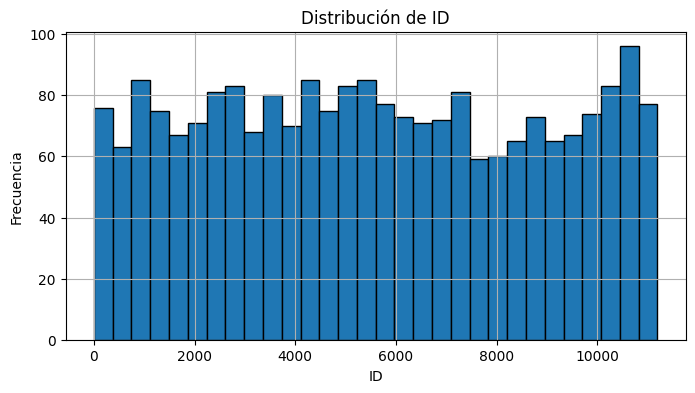

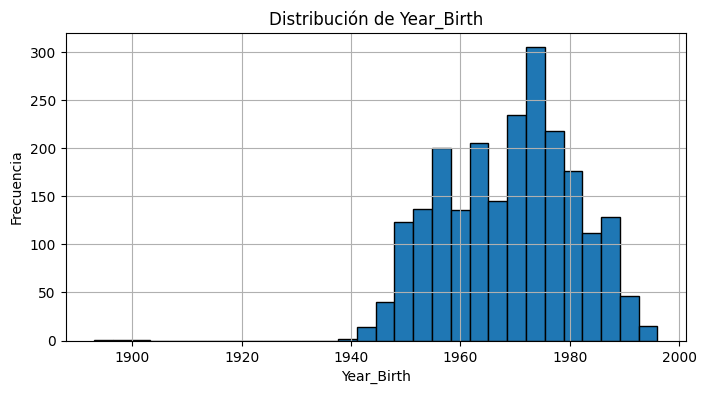

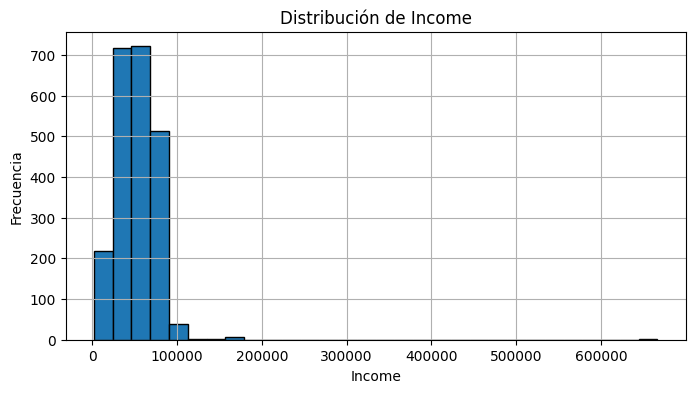

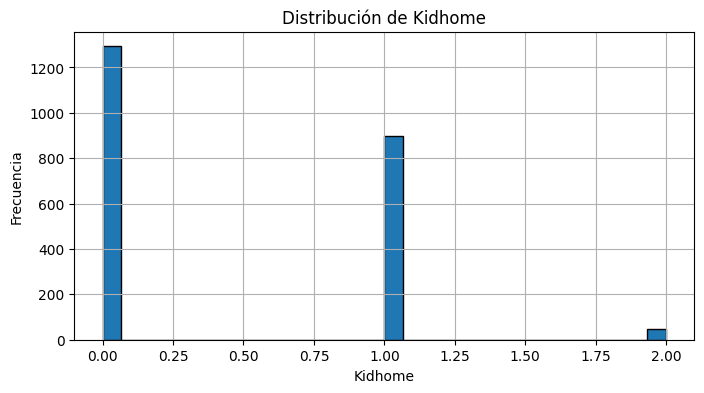

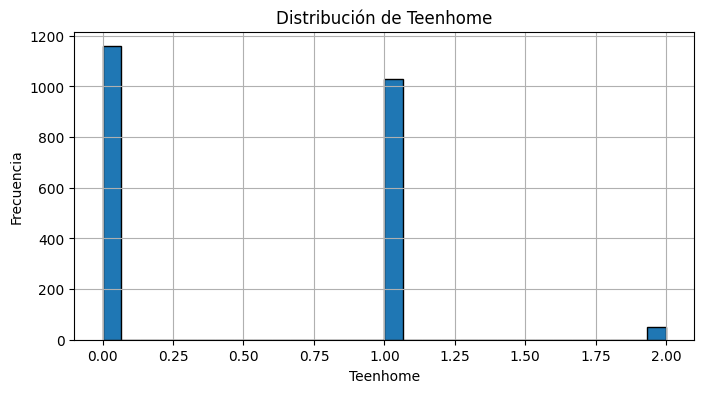

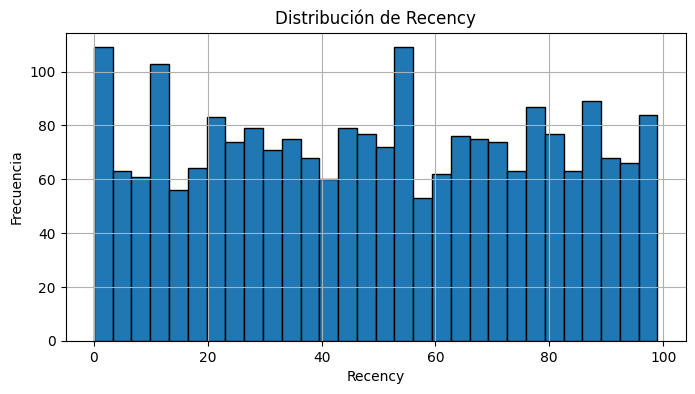

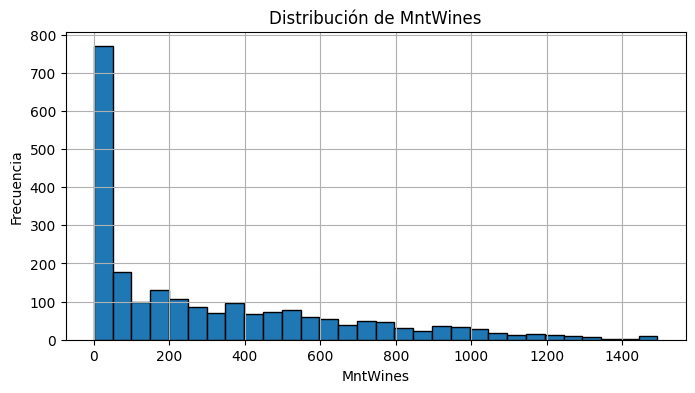

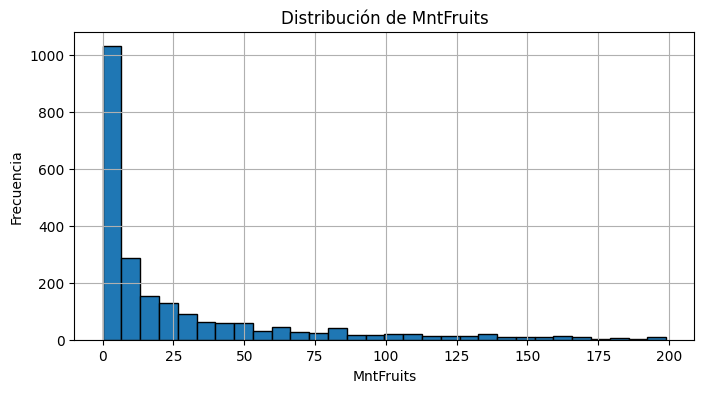

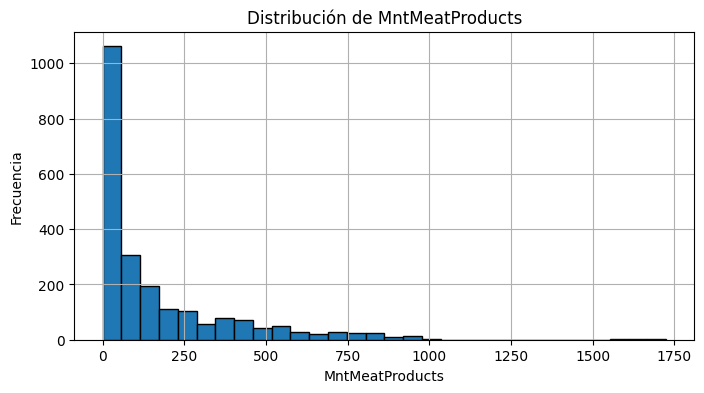

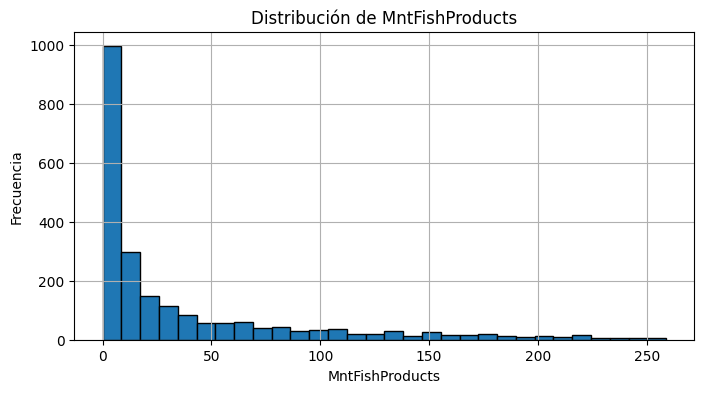

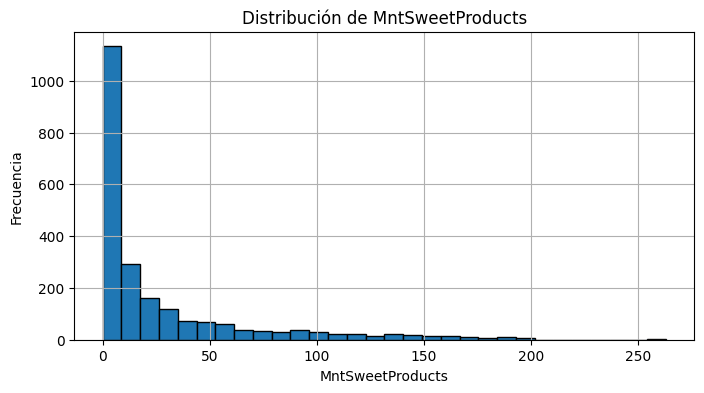

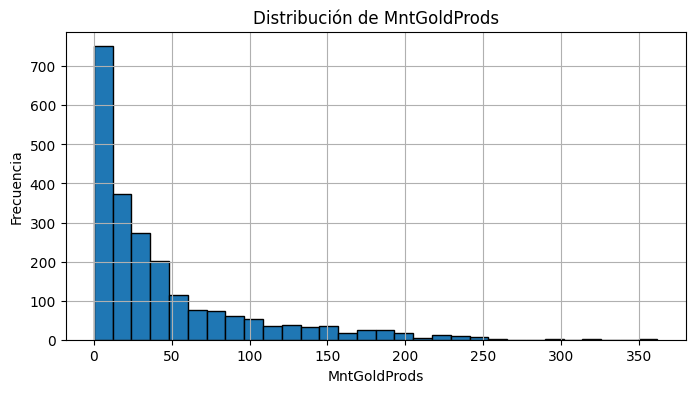

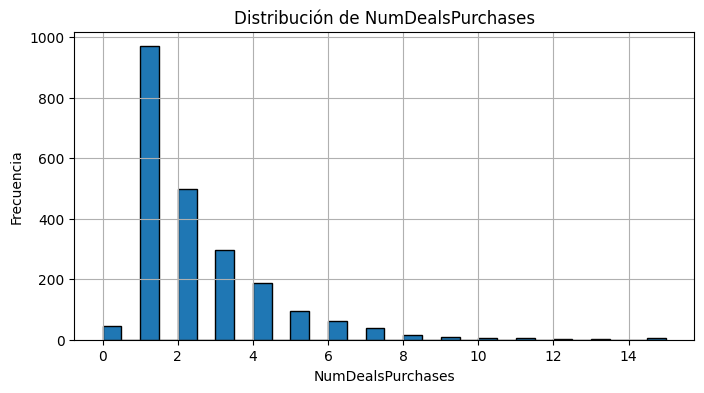

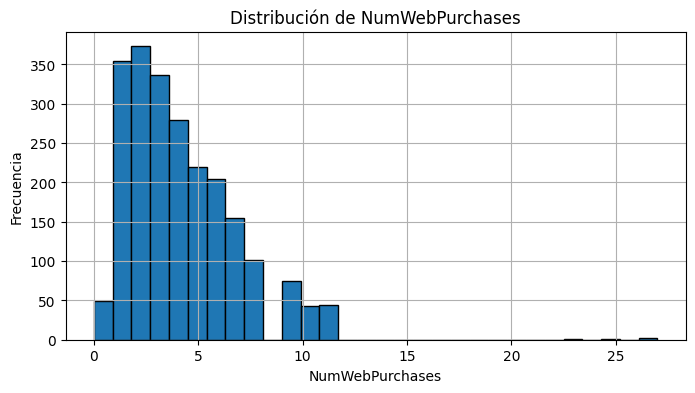

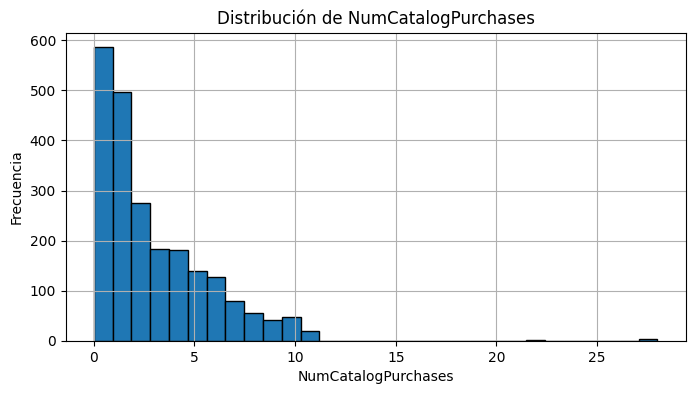

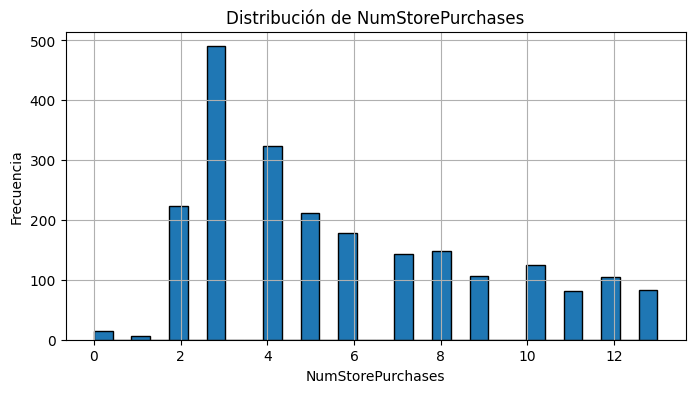

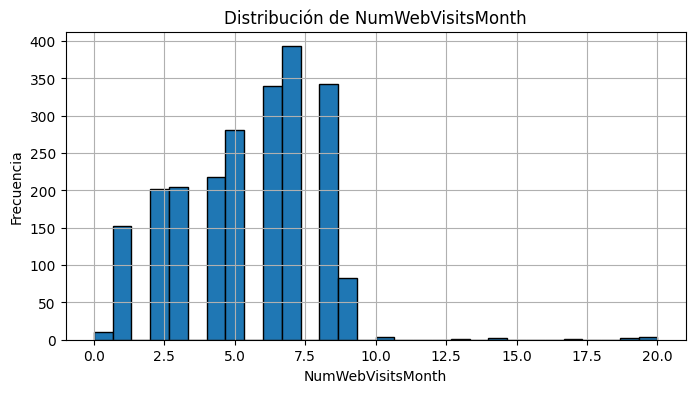

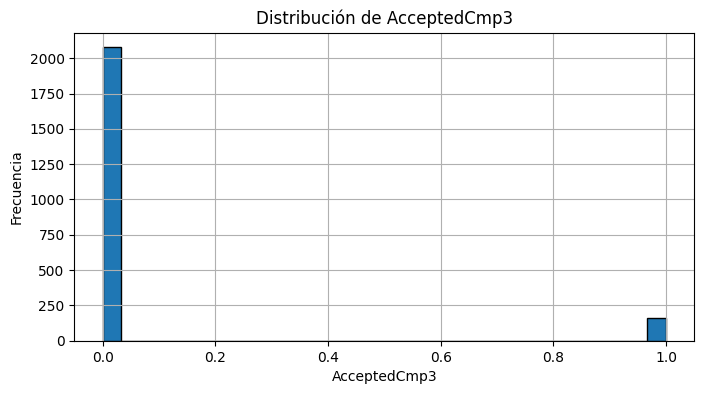

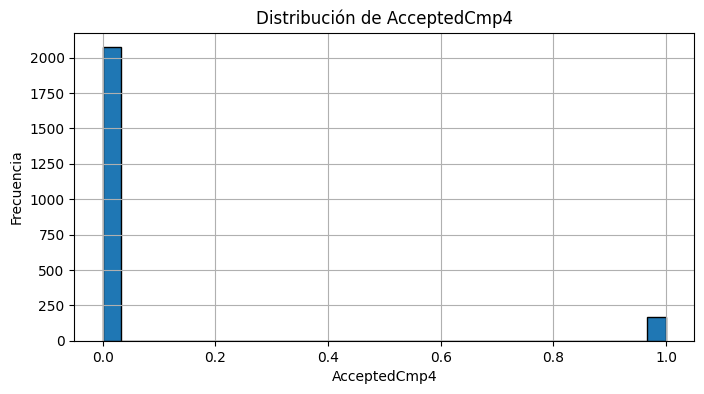

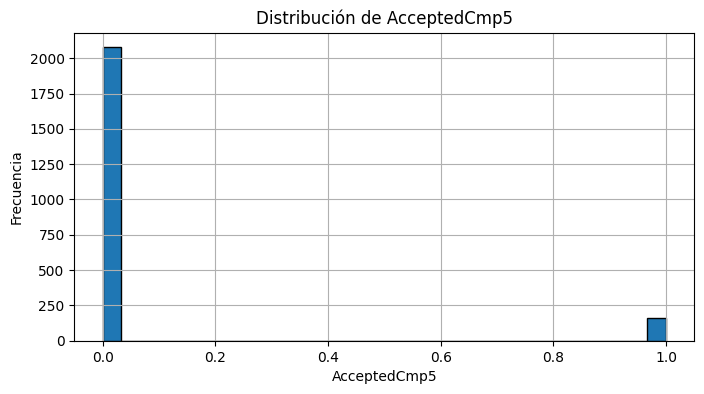

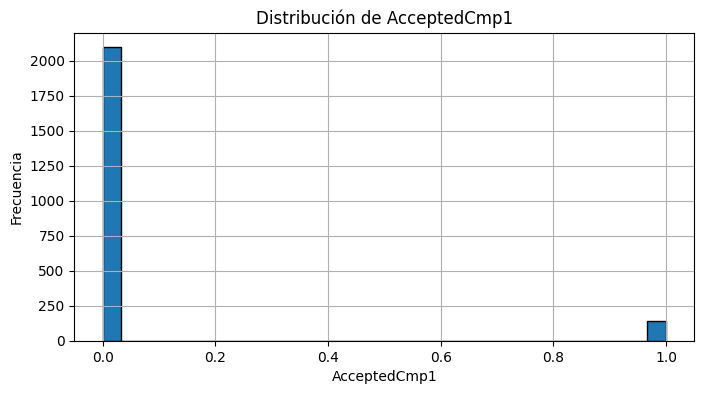

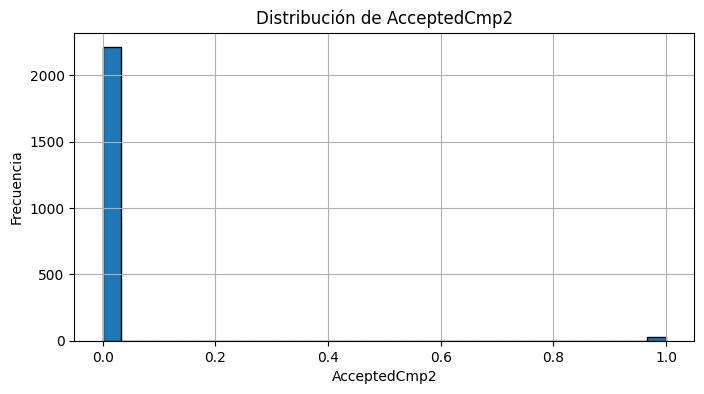

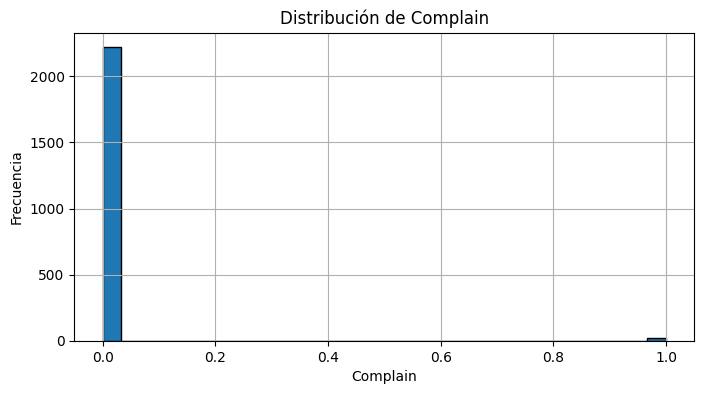

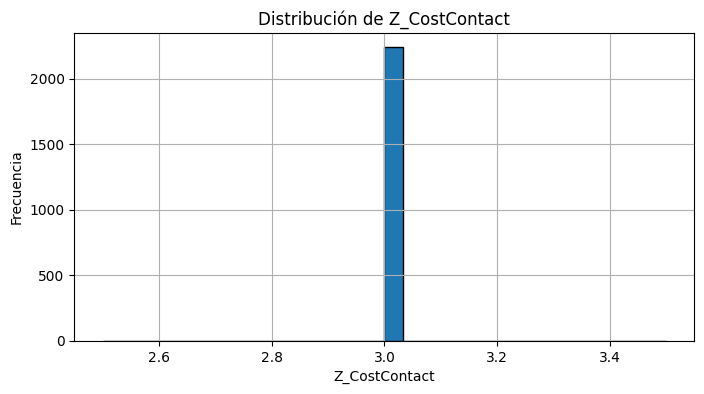

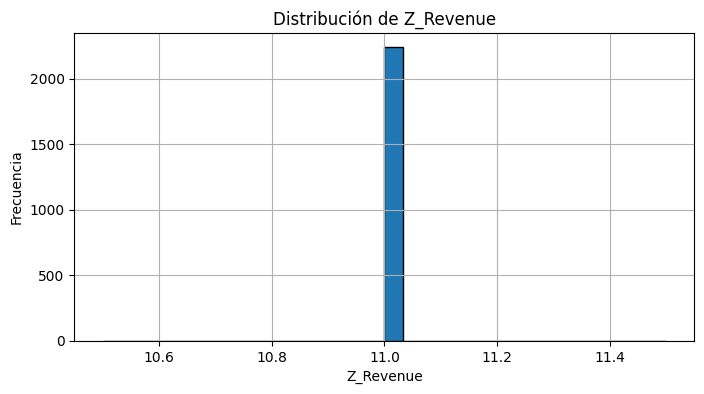

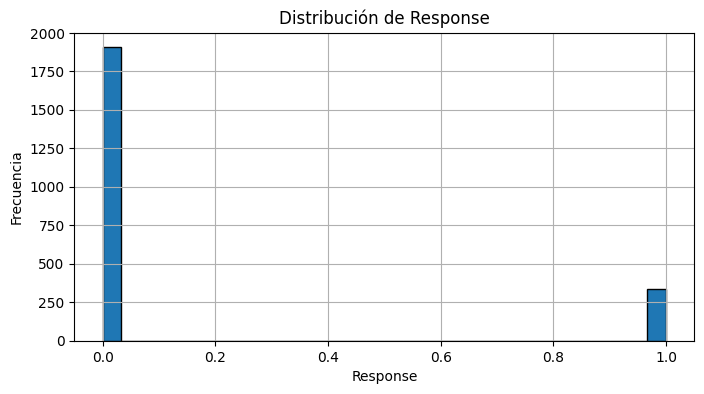

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt


# 7. Distribución de las variables (histogramas)
print("\nMostrando distribuciones de Variables Numéricas:")

# Limitar el tamaño de las imágenes y mostrar una a la vez
for column in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(8, 4))  # Controlar el tamaño del gráfico
    df[column].hist(bins=30, edgecolor='black')
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()

In [ ]:
#Mostrar el datacet
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


------

# Parte 2. LIMPIEZA DE DATOS

## 1. Eliminar duplicados

In [ ]:
df = df.drop_duplicates()
print(f"✔️ Duplicados eliminados. Total de registros: {len(df)}")

✔️ Duplicados eliminados. Total de registros: 2240


## 2. Verificar valores nulos por columna

In [ ]:
nulos_antes = df['Income'].isnull().sum()
income_median = df['Income'].median()
df['Income'] = df['Income'].fillna(income_median)
print(f"✔️ Se imputaron {nulos_antes} valores nulos en 'Income' usando la mediana: {income_median}")


✔️ Se imputaron 24 valores nulos en 'Income' usando la mediana: 51381.5


In [ ]:
valores_nulos = df.isnull().sum()
tools.display_dataframe_to_user(name="Valores Nulos", dataframe=valores_nulos[valores_nulos > 0].to_frame("Valores Nulos"))

Valores Nulos


Loading ITables v2.4.0 from the internet... (need help?)


## 3. CONVERSIÓN DE 'Dt_Customer' A FECHA

In [ ]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format="%d-%m-%Y")
print("✔️ 'Dt_Customer' convertido a datetime.")

✔️ 'Dt_Customer' convertido a datetime.


### 3.1 Transformaciones iniciales

In [ ]:
# Derivar antigüedad del cliente (en días)
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])
df["Customer_Age_Days"] = (pd.to_datetime("2024-01-01") - df["Dt_Customer"]).dt.days

# Revisar redundancia entre Kidhome y Teenhome
df["Total_Kids"] = df["Kidhome"] + df["Teenhome"]


## 4. Eliminar columnas con muchos nulos (ej. más del 30%)

In [ ]:
umbral = 0.3  # 30%
columnas_a_eliminar = valores_nulos[valores_nulos > len(df) * umbral].index
df = df.drop(columns=columnas_a_eliminar)
print(f"✔️ Columnas eliminadas por tener más de {umbral*100}% de nulos: {list(columnas_a_eliminar)}")


✔️ Columnas eliminadas por tener más de 30.0% de nulos: []


## 5. Eliminacion de Columnas Constantes

In [ ]:
columnas_constantes = ['Z_CostContact', 'Z_Revenue']
columnas_existentes = [col for col in columnas_constantes if col in df.columns]

if columnas_existentes:
    df = df.drop(columns=columnas_existentes)
    print(f"✔️ Columnas eliminadas por ser constantes: {columnas_existentes}")
else:
    print("⚠️ No se encontraron las columnas constantes esperadas en el DataFrame.")

✔️ Columnas eliminadas por ser constantes: ['Z_CostContact', 'Z_Revenue']


## 6. Rellenar valores nulos en columnas categóricas

### 6.1 Categorizar

In [ ]:
# Categorizar
df["Education"] = df["Education"].astype("category")
df["Marital_Status"] = df["Marital_Status"].astype("category")

### 6.2 Imputar columnas categoricas

In [ ]:
for col in df.select_dtypes(include=['object']).columns:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])


## 7. Transformacion de Variables binarias. 0/1 A 'Sí'/'No'

In [ ]:
binarios = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response']
df[binarios] = df[binarios].replace({0: "No", 1: "Sí"})
df["Response"] = df["Response"].map({0: "No", 1: "Sí"})
print("✔️ Variables binarias convertidas a 'Sí'/'No'.")

✔️ Variables binarias convertidas a 'Sí'/'No'.


## 8. Verificacion de Categorias Textuales

In [ ]:
# Confirmación visual opcional (puedes mostrar en frontend si quieres)
print("✔️ Categorías únicas en Education:", df['Education'].unique())
print("✔️ Categorías únicas en Marital_Status:", df['Marital_Status'].unique())

✔️ Categorías únicas en Education: ['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle']
Categories (5, object): ['2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD']
✔️ Categorías únicas en Marital_Status: ['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO']
Categories (8, object): ['Absurd', 'Alone', 'Divorced', 'Married', 'Single', 'Together', 'Widow',
                         'YOLO']


## 9. Mostrar correlaciones

In [ ]:
correlaciones_limpias = df.select_dtypes(include=["number"]).corr()
tools.display_dataframe_to_user(name="Correlaciones Limpias", dataframe=correlaciones_limpias)


Correlaciones Limpias


Loading ITables v2.4.0 from the internet... (need help?)


## 10. Validación final

In [ ]:
print("🔍 Validación final de nulos por columna:")
print(df.isnull().sum())

print("\n📊 Tipos de datos finales:")
print(df.dtypes)

tools.display_dataframe_to_user(name="Dataset Final Limpio", dataframe=df)
tools.display_dataframe_to_user(name="Tipos de Datos Finales", dataframe=df.dtypes.to_frame("Tipo"))
tools.display_dataframe_to_user(name="Resumen Nulos", dataframe=df.isnull().sum().to_frame("Nulos"))


🔍 Validación final de nulos por columna:
ID                        0
Year_Birth                0
Education                 0
Marital_Status            0
Income                    0
Kidhome                   0
Teenhome                  0
Dt_Customer               0
Recency                   0
MntWines                  0
MntFruits                 0
MntMeatProducts           0
MntFishProducts           0
MntSweetProducts          0
MntGoldProds              0
NumDealsPurchases         0
NumWebPurchases           0
NumCatalogPurchases       0
NumStorePurchases         0
NumWebVisitsMonth         0
AcceptedCmp3              0
AcceptedCmp4              0
AcceptedCmp5              0
AcceptedCmp1              0
AcceptedCmp2              0
Complain                  0
Response               2240
Customer_Age_Days         0
Total_Kids                0
dtype: int64

📊 Tipos de datos finales:
ID                              int64
Year_Birth                      int64
Education                    ca

Loading ITables v2.4.0 from the internet... (need help?)


Tipos de Datos Finales


Loading ITables v2.4.0 from the internet... (need help?)


Resumen Nulos


Loading ITables v2.4.0 from the internet... (need help?)


In [ ]:
import ace_tools_open as tools

tools.display_dataframe_to_user(name="Dataset Final Limpio", dataframe=df)
tools.display_dataframe_to_user(name="Tipos de Datos Finales", dataframe=df.dtypes.to_frame("Tipo"))
tools.display_dataframe_to_user(name="Resumen Nulos", dataframe=df.isnull().sum().to_frame("Nulos"))


Dataset Final Limpio


Loading ITables v2.4.0 from the internet... (need help?)


Tipos de Datos Finales


Loading ITables v2.4.0 from the internet... (need help?)


Resumen Nulos


Loading ITables v2.4.0 from the internet... (need help?)


### 10.1 EDA

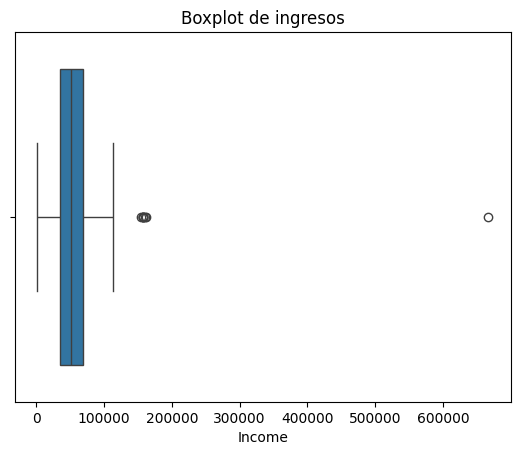

In [ ]:
# Visualizar outliers en ingresos
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df["Income"])
plt.title("Boxplot de ingresos")
plt.show()

# (Opcional) Eliminar outliers usando rango intercuartílico
q1 = df["Income"].quantile(0.25)
q3 = df["Income"].quantile(0.75)
iqr = q3 - q1
df = df[(df["Income"] >= q1 - 1.5*iqr) & (df["Income"] <= q3 + 1.5*iqr)]


### 10.2 Estado del dataset


In [ ]:
# Tabla resumen de transformaciones realizadas
transformaciones = {
    "Columna": ["Income", "Education", "Dt_Customer", "Kidhome/Teenhome"],
    "Acción": [
        "Imputación con mediana",
        "Convertida a 'category'",
        "Calculada antigüedad del cliente",
        "Combinadas en nueva columna Total_Kids"
    ]
}
pd.DataFrame(transformaciones)


,Columna,Acción
0,Income,Imputación con mediana
1,Education,Convertida a 'category'
2,Dt_Customer,Calculada antigüedad del cliente
3,Kidhome/Teenhome,Combinadas en nueva columna Total_Kids


### 10.3 Resultados

In [ ]:
# Ingreso promedio por nivel educativo
df.groupby("Education")["Income"].mean().sort_values(ascending=False)

# Participación en campañas por estado civil
df.groupby("Marital_Status")["Response"].value_counts(normalize=True).unstack()


<ipython-input-28-b93a84807b2c>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Education")["Income"].mean().sort_values(ascending=False)
<ipython-input-28-b93a84807b2c>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Marital_Status")["Response"].value_counts(normalize=True).unstack()


Response
Marital_Status


In [ ]:
if df['Response'].dtype == 'category':
  accepted_count = df['Response'][df['Response'] == 'Sí'].count()
elif df['Response'].dtype == 'object': # Asumiendo que 'Sí'/'No' son strings
  accepted_count = (df['Response'] == 'Sí').sum()
else:
    # Si por alguna razón no es ni category ni object, mostramos un mensaje de error
    accepted_count = "Error: La columna 'Response' no tiene el formato esperado ('Sí'/'No')."
    print(accepted_count)

if isinstance(accepted_count, int):
    print(f"\nTotal de clientes que aceptaron la última campaña (Response): {accepted_count}")

# Si se transformaron a 'Sí'/'No' previamente, necesitamos reconvertirlas temporalmente para la suma.
campain_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

# Convertir temporalmente las columnas de campaña a numérico (1 para 'Sí', 0 para 'No')
# Solo si ya fueron convertidas a 'Sí'/'No'
temp_df_campaigns = df[campain_cols].copy()

for col in campain_cols:
    if temp_df_campaigns[col].dtype in ['object', 'category']:
        temp_df_campaigns[col] = temp_df_campaigns[col].map({'Sí': 1, 'No': 0})

# Sumar las aceptaciones de todas las campañas por cliente
df['Total_Campaign_Acceptances'] = temp_df_campaigns.sum(axis=1)

# Mostrar el total de aceptaciones por cliente
print("\nPrimeras filas con el total de campañas aceptadas por cliente:")
print(df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Total_Campaign_Acceptances']].head())

# Mostrar el total general de todas las aceptaciones en todas las campañas
total_all_campaign_acceptances = df['Total_Campaign_Acceptances'].sum()
print(f"\nSuma total de todas las aceptaciones a todas las campañas (sumando 1 por cada 'Sí' en Cmp1-Cmp5 por cliente): {total_all_campaign_acceptances}")

if isinstance(accepted_count, int):
    print(f"\nSuma total de aceptaciones para la última campaña (Response): {accepted_count}")


Primeras filas con el total de campañas aceptadas por cliente:
  AcceptedCmp1 AcceptedCmp2 AcceptedCmp3 AcceptedCmp4 AcceptedCmp5  \
0           No           No           No           No           No   
1           No           No           No           No           No   
2           No           No           No           No           No   
3           No           No           No           No           No   
4           No           No           No           No           No   

   Total_Campaign_Acceptances  
0                           0  
1                           0  
2                           0  
3                           0  
4                           0  

Suma total de todas las aceptaciones a todas las campañas (sumando 1 por cada 'Sí' en Cmp1-Cmp5 por cliente): 667


## 11. Análisis de Resultados del Proceso de Limpieza



1. **Duplicados**
  * Se eliminaron registros duplicados, garantizando que cada cliente tenga una representación única en el dataset. Esto mejora la precisión en cualquier análisis de segmentación, modelos predictivos o visualizaciones.

2. **Valores Nulos**
   * La variable `Income`, fundamental para análisis socioeconómicos, presentaba 24 valores nulos (\~1.07%).
   * Se imputaron utilizando la **mediana**, lo cual es adecuado ya que evita la distorsión por valores atípicos.

   * No se encontraron más columnas con nulos relevantes después de esta imputación.

3. **Columnas con muchos nulos y sin variabilidad**
   * Columnas con más del 30% de valores nulos fueron eliminadas por no aportar información confiable.
   * También se eliminaron `Z_CostContact` y `Z_Revenue`, que tenían un único valor para todos los registros. Este paso evita ruido y simplifica los modelos analíticos.

4. **Conversión de Variables**

   * `Dt_Customer` se transformó exitosamente a formato `datetime`, permitiendo análisis temporales como antigüedad del cliente.
   * Las variables binarias (`AcceptedCmpX`, `Complain`, `Response`) se recodificaron a “Sí”/“No”, mejorando la legibilidad y utilidad en reportes.
   * Se aplicó **One-Hot Encoding** a variables categóricas para facilitar su uso en análisis multivariado y modelos de Machine Learning.

5. **Correlaciones**
   * La matriz de correlaciones generada sobre el dataset codificado permite identificar relaciones estadísticas entre variables como:

   * `Income`, `Education` y `Spending` (gasto en productos de diferentes tipos).
   * Potenciales patrones de respuesta a campañas (`AcceptedCmpX`) relacionados con nivel económico o familiar.




## 12. Conclusión de la Limpieza



El dataset quedó limpio, estructurado y listo para su uso en análisis exploratorios, segmentación de clientes o construcción de modelos predictivos.
La limpieza aplicada garantiza que los resultados futuros estarán basados en datos coherentes, sin sesgos por duplicados o información irrelevante.

In [ ]:
# Guardar el DataFrame limpio y transformado como CSV
df.to_csv("dataset_limpio.csv", index=False)
print("Archivo CSV guardado como 'dataset_limpio.csv'")


Archivo CSV guardado como 'dataset_limpio.csv'


In [ ]:
from google.colab import files
files.download("dataset_limpio.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>